#### 关键词提取
- 定义：从文本中把与这篇文章意义最相关的一些词语抽取出来。
- 应用：在文献检索、自动文摘、文本聚类/分类等方面有着重要的应用，它不仅是进行这些工作不可或缺的基础和前提，也是互联网上信息建库的一项重要工作。

#### 关键词抽取的方法-----主要有两种
- 关键词分配：给定一个已有的关键词库，对于新来的文档从该词库里面匹配几个词语作为这篇文档的关键词。
- 关键词提取：针对新文档，通过算法分析，提取文档中一些词语作为该文档的关键词。目前。大多数应用领域的关键词抽取算法都是基于第二种方法实现的，因为第二种方法在实际应用中更准确。

#### 基于TF-IDF算法进行关键词提取
- 在信息检索理论中，TF-IDF是(Term Frequency-Inverse Document Frequency)的简写。TF-IDF是一种数值统计，用来反映一个词语对于语料中某篇文档的重要性。在信息检索和文本挖掘领域，它经常用于因子加权。TF-IDF的主要思想：如果某个词在一篇文档中出现的频率越高，即TF越高；并且在语料库中其他文档中很少出现，即DF低，也就是IDF越高，则认为这个词具有很好的类别区分能力。
- TF（Term Frequency）词频：表示词语在文档d中出现的概率，计算公式如下：
\begin{equation}
\mathrm{tf}_{\mathrm{i}, \mathrm{j}}=\frac{n_{i, j}}{\sum_{k} n_{k, j}}
\end{equation}
其中,$\boldsymbol{n}_{i, j}$是该词语$\boldsymbol{t}_{i}$在文档$\boldsymbol{d}_{j}$中出现的次数，而分母则是在文档$\boldsymbol{d}_{j}$中所有字词的出现次数之和。
- IDF（Inverse Document Frequency）逆文档频率：表示语料库中包含词语$\boldsymbol{t}_{i}$的文档的数目的倒数，计算公式如下：
\begin{equation}
\operatorname{idf}_{\mathbf{i}}=\log \frac{|D|}{\left|\left\{j : t_{i} \in d_{j}\right\}\right|}
\end{equation}
其中，$|D|$表示语料库中文档的总数，$\left|\left\{j : t_{i} \in d_{j}\right\}\right|$表示包含词语$\boldsymbol{t}_{i}$的文档数量。如果该词语不出现在语料库中，就会导致被除数为0，因此一般情况下使用1+$\left|\left\{j : t_{i} \in d_{j}\right\}\right|$
- TF-IDF在实际中主要是将上面的两者相乘，即TF\*IDF,计算公式如下：
\begin{equation}
\operatorname{TF-IDF}_{i, j}=\operatorname{tf}_{i, j} \times \operatorname{idf}_{i}
\end{equation}
因此，TF-IDF倾向于过滤常见的词语，保留重要的词语。例如，某一特定文档内的高频词语，以及该词语在整个文档集合中的低文件频率，可以产生出高权重的TF-IDF。
- jieba分词库已经实现了基于TF-IDF算法的关键词抽取，通过import jieba.analyse引入，函数参数解释如下：
    ```
    jieba.analyse.extract_tags(sentence, topK=20, withWeight=False,allowPOS=())
    ```
    - sentence:待提取的文本语料
    - topK:返回TF-IDF权重最大的关键词个数，默认是20
    - withWeight:是否需要返回关键词权重值，默认是False
    - allowPOS:仅包括指定词性的词，默认值是空，即不筛选

In [1]:
import jieba.analyse

sentence = "人工智能（Artificial Intelligence），英文缩写为AI。它是研究、开发用于模拟、延伸和扩展人的智能的理论、方法、技术及应用系统的一门新的技术科学。人工智能是计算机科学的一个分支，它企图了解智能的实质，并生产出一种新的能以人类智能相似的方式做出反应的智能机器，该领域的研究包括机器人、语言识别、图像识别、自然语言处理和专家系统等。人工智能从诞生以来，理论和技术日益成熟，应用领域也不断扩大，可以设想，未来人工智能带来的科技产品，将会是人类智慧的“容器”。人工智能可以对人的意识、思维的信息过程的模拟。人工智能不是人的智能，但能像人那样思考、也可能超过人的智能。人工智能是一门极富挑战性的科学，从事这项工作的人必须懂得计算机知识，心理学和哲学。人工智能是包括十分广泛的科学，它由不同的领域组成，如机器学习，计算机视觉等等，总的说来，人工智能研究的一个主要目标是使机器能够胜任一些通常需要人类智能才能完成的复杂工作。但不同的时代、不同的人对这种“复杂工作”的理解是不同的。 [1]  2017年12月，人工智能入选“2017年度中国媒体十大流行语”。"
keywords = " ".join(jieba.analyse.extract_tags(sentence=sentence, topK=20, withWeight=False, allowPOS=()))
print(keywords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.660 seconds.
Prefix dict has been built succesfully.


人工智能 智能 2017 机器 不同 人类 科学 模拟 一门 技术 计算机 研究 工作 AI 12 Artificial Intelligence 图像识别 复杂 流行语


In [2]:
keywords = jieba.analyse.extract_tags(sentence, topK=10, withWeight=True, allowPOS=(['n', 'v']))   # 只提取前10个名词和动词
print(keywords)

[('人工智能', 0.9750542675762887), ('智能', 0.5167124540885567), ('机器', 0.20540911929525774), ('人类', 0.17414426566082475), ('科学', 0.17250169374402063), ('模拟', 0.15723537382948452), ('技术', 0.14596259315164947), ('计算机', 0.14030483362639176), ('图像识别', 0.12324502580309278), ('流行语', 0.11242211730309279)]


#### 基于TextRank算法进行关键词提取
- TextRank是由PangeRank改进而来的，核心思想是将文本中的词语当作图中的节点，通过边相互连接，不同的节点会有不同的权重，权重高的节点可以作为关键字。TextRank的计算公式如下：
$$
W S\left(V_{i}\right)=(1-d)+d * \sum_{V_{j} \in I n\left(V_{i}\right)} \frac{w_{j i}}{\sum_{V_{k} \in O u t\left(V_{j}\right)}} W S\left(V_{j}\right)
$$
从上式可以看出，节点i的权重取决于节点i的邻接节点中i到j这条边的权重、j节点的所有出度的边的权重、节点j的权重这个三个因素。将这些邻接节点计算的权重相加，再乘上一定的阻尼系数，就是节点i的权重，阻尼系数d一般取0.85
- TextRank用于关键词提取的算法如下：
    - (1)把给定的文本T按照完整句子进行分割，即：
    $$
    T=\left[S_{1}, S_{2}, \cdots, S_{m}\right]
    $$
    - (2)对每个句子，进行分词和词性标注处理，并过滤掉停用词，只保留指定词性的词语(如名词、动词、形容词),其中$t_{i, j}$是保留后的候选关键词。
    $$
    S_{i}=\left[t_{i, 1}, t_{i, 2}, \cdots, t_{i, n}\right]
    $$
    - (3)构建候选关键词图G=(V,E)，其中V是节点集，由(2)步中生成的候选关键词组成。然后采用共现关系(Co-Occurrence)构造任意两个节点之间的边，两个节点之间存在边即仅当它们对应的词汇在长度为K的窗口中共现，K表示窗口大小，即最多共现K个单词。
    - (4)根据TextRank的公式，迭代传播各节点的权重，直到收敛。
    - (5)对节点权重进行倒序排列，从而得到最重要的T个单词，作为候选关键词。
    - (6)由第(5)步得到最重要的T个词汇，在原始文本中进行标记，如果构成相邻词组，则组合成多词关键词。
- jieba库中已经实现了基于TextRank算法的关键词抽取，通过命令import jieba.analyse

In [3]:
jieba.analyse.textrank(sentence, topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))

['智能',
 '人工智能',
 '机器',
 '人类',
 '研究',
 '技术',
 '模拟',
 '包括',
 '科学',
 '工作',
 '领域',
 '理论',
 '计算机',
 '年度',
 '需要',
 '语言',
 '相似',
 '方式',
 '做出',
 '心理学']

In [4]:
result = " ".join(jieba.analyse.textrank(sentence, topK=20, withWeight=False, allowPOS=("ns", "n", "vn", "v")))
print(result)

智能 人工智能 机器 人类 研究 技术 模拟 包括 科学 工作 领域 理论 计算机 年度 需要 语言 相似 方式 做出 心理学


In [5]:
result = " ".join(jieba.analyse.textrank(sentence, topK=20, withWeight=False, allowPOS=("n", "v")))  # 只看动词和名词
print(result)

智能 人工智能 机器 人类 技术 模拟 包括 科学 理论 计算机 领域 年度 需要 心理学 信息 语言 识别 带来 过程 延伸


#### 基于LDA主题模型进行关键词抽取
- 语料是一个关于汽车的短文本，下面通过gensim库完成基于LDA的关键词提取。整个过程的步骤为：
    - (1)文件加载
    - (2)jieba分词
    - (3)去停用词
    - (4)构建词袋模型
    - (5)LDA模型训练
    - (6)结果可视化

In [7]:
import jieba.analyse as analyse
import jieba
import pandas as pd
from gensim import corpora, models, similarities
import gensim
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# 设置文件路径
dir = "E://DeepLearning//jupyter_code//dataset//corpus//02_project//"
file_desc = "".join([dir, "car.csv"])
stop_words = "".join([dir, "stopwords.txt"])

In [17]:
# 定义停用词
stopwords = pd.read_csv(stop_words, index_col=False, quoting=3, sep="\t", names=["stopword"], encoding="utf-8")
stopwords = stopwords['stopword'].values

# 加载语料
df = pd.read_csv(file_desc, encoding='utf-8')

# 删除nan行
df.dropna(inplace=True)
lines = df.content.values.tolist()

In [18]:
# 开始分词
sentences = []
for line in lines:
    try:
        segs = jieba.lcut(line)
        segs = [v for v in segs if not str(v).isdigit()]  # 去数字
        segs = list(filter(lambda x: x.strip(), segs))  # 去空格
        segs = list(filter(lambda x: x not in stopwords, segs))  # 去停用词
        sentences.append(segs)
    except Exception:
        print(line)
        continue

In [24]:
# 构建词袋模型
dictionary = corpora.Dictionary(sentences)
corpus = [dictionary.doc2bow(sentence) for sentence in sentences]
# lda模型，num_topics是主题个数
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# 查一下第1号分类，其中最常出现的5个词
print(lda.print_topic(1, topn=5))
print("---------------------------------分割线-------------------------------------")
# 打印所有10个主题，每个主题显示8个词
for topic in lda.print_topics(num_topics=10, num_words=8):
    print(topic[1])

0.024*"汽车" + 0.020*"品牌" + 0.016*"中国" + 0.013*"市场" + 0.011*"自主"
---------------------------------分割线-------------------------------------
0.038*"汽车" + 0.023*"中国" + 0.017*"奥迪" + 0.014*"销售" + 0.011*"经销商" + 0.010*"公司" + 0.010*"一汽" + 0.007*"车展"
0.024*"汽车" + 0.020*"品牌" + 0.016*"中国" + 0.013*"市场" + 0.011*"自主" + 0.008*"新能源" + 0.006*"发展" + 0.006*"产品"
0.024*"易到" + 0.024*"车辆" + 0.009*"相关" + 0.008*"解决方案" + 0.007*"网约车" + 0.006*"信息" + 0.006*"机动车" + 0.006*"被"
0.015*"服务" + 0.011*"用户" + 0.011*"车辆" + 0.011*"出行" + 0.010*"车" + 0.009*"司机" + 0.009*"城市" + 0.008*"汽车"
0.026*"万辆" + 0.026*"销量" + 0.023*"增长" + 0.019*"汽车" + 0.018*"同比" + 0.014*"新能源" + 0.011*"市场" + 0.010*"辆"
0.041*"二手车" + 0.012*"数据" + 0.012*"瓜子" + 0.011*"市场" + 0.009*"行业" + 0.008*"交易" + 0.008*"配件" + 0.007*"金融"
0.011*"里程" + 0.009*"元" + 0.007*"公里" + 0.007*"开车" + 0.007*"时间" + 0.006*"功能" + 0.006*"优惠" + 0.006*"充电"
0.014*"系统" + 0.013*"动力" + 0.012*"发动机" + 0.012*"充电" + 0.011*"车型" + 0.009*"L" + 0.008*"采用" + 0.007*"万元"
0.041*"汽车" + 0.014*"技术" + 0.014*"发展" + 0.00

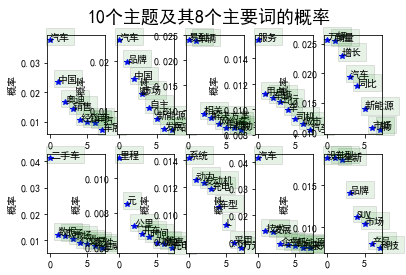

In [29]:
# 显示中文matplotlib
plt.rcParams["font.sans-serif"] = [u'SimHei']
plt.rcParams["axes.unicode_minus"] = False
# 在可视化部分，首先画出10个主题的8个词的概率分布图
num_show_term = 8  # 每个主题下显示几个词
num_topics = 10
for i, k in enumerate(range(num_topics)):
    ax = plt.subplot(2, 5, i+1)
    item_dis_all = lda.get_topic_terms(topicid=k)
    item_dis = np.array(item_dis_all[:num_show_term])
    ax.plot(range(num_show_term), item_dis[:, 1], 'b*')
    item_word_id = item_dis[:, 0].astype(np.int)
    word = [dictionary.id2token[i] for i in item_word_id]
    ax.set_ylabel(u"概率")
    for j in range(num_show_term):
        ax.text(j, item_dis[j, 1], word[j], bbox=dict(facecolor='green', alpha=0.1))
plt.suptitle(u"10个主题及其8个主要词的概率", fontsize=18)
plt.show()

#### 基于pyhanlp进行关键词提取
- HanLP也可以进行关键词提取，内部采用TextRankKeyword实现，如下面所示:

In [30]:
from pyhanlp import *

result = HanLP.extractKeyword(sentence, 20)
print(result)

[人工智能, 智能, 人类, 研究, 不同, 工作, 包括, 领域, 模拟, 理论, 技术, 新的, 门, 机器, 计算机, 科学, 入选, 复杂, AI, 12月]
